In [1]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_columns = None

## Importing Data
> Data comes in all kinds of shapes and sizes and so the process we use to get everything into code often varies.

We discovered **how our data is structured** by analysing the files accessible.
We begin at the top, noting that many temperature and energy spreadsheets are formatted as CSVs.
Although there are a large number of them, this is simply due to the material being broken into small parts.
Each CSV builds on the one before it.
Dates, as well as a range of temperature, humidity, and precipitation readings, are included in the real temperature spreadsheets.
Our energy files are much simpler, providing only dates, energy demand history, pricing (RRP), and whether the data was logged manually or automatically.

In [2]:
energy_locations = os.listdir("../Data/Energy")
temperature_locations = os.listdir("../Data/Temperature")

energy_CSVs = [pd.read_csv("../Data/Energy/" + location) for location in energy_locations]
temperature_CSVs = [pd.read_csv("../Data/Temperature/" + location) for location in temperature_locations if "Data" in location]

/tmp/ipykernel_3739/1687351513.py:5: DtypeWarning: Columns (12,16,22,24,26,28,30) have mixed types.Specify dtype option on import or set low_memory=False.
  temperature_CSVs = [pd.read_csv("../Data/Temperature/" + location) for location in temperature_locations if "Data" in location]
/tmp/ipykernel_3739/1687351513.py:5: DtypeWarning: Columns (12,14,18,20,22,24,26,28,32) have mixed types.Specify dtype option on import or set low_memory=False.
  temperature_CSVs = [pd.read_csv("../Data/Temperature/" + location) for location in temperature_locations if "Data" in location]
/tmp/ipykernel_3739/1687351513.py:5: DtypeWarning: Columns (12,14,18,20,22,32) have mixed types.Specify dtype option on import or set low_memory=False.
  temperature_CSVs = [pd.read_csv("../Data/Temperature/" + location) for location in temperature_locations if "Data" in location]
/tmp/ipykernel_3739/1687351513.py:5: DtypeWarning: Columns (12,14,18,20,28,32) have mixed types.Specify dtype option on import or set low_memo

In [3]:
energy_data = pd.concat(energy_CSVs, ignore_index=True)
temperature_data = pd.concat(temperature_CSVs, ignore_index=True)

Now, believe it or not, we've done 90% of the importing, the only thing left is to ensure our features (columns) are named succinctly and consistently.
Through renaming our columns (like below), we make it clear what is in each column.
Future us will definitely be grateful!

In [4]:
energy_data.columns
temperature_data.columns

Index(['REGION', 'SETTLEMENTDATE', 'TOTALDEMAND', 'RRP', 'PERIODTYPE'], dtype='object')

Index(['hm', 'Station Number', 'Year Month Day Hour Minutes in YYYY', 'MM',
       'DD', 'HH24', 'MI format in Local time',
       'Year Month Day Hour Minutes in YYYY.1', 'MM.1', 'DD.1', 'HH24.1',
       'MI format in Local standard time',
       'Precipitation since 9am local time in mm',
       'Quality of precipitation since 9am local time',
       'Air Temperature in degrees C', 'Quality of air temperature',
       'Wet bulb temperature in degrees C', 'Quality of Wet bulb temperature',
       'Dew point temperature in degrees C',
       'Quality of dew point temperature', 'Relative humidity in percentage %',
       'Quality of relative humidity', 'Wind speed in km/h',
       'Wind speed quality', 'Wind direction in degrees true',
       'Wind direction quality',
       'Speed of maximum windgust in last 10 minutes in  km/h',
       'Quality of speed of maximum windgust in last 10 minutes',
       'Mean sea level pressure in hPa', 'Quality of mean sea level pressure',
       'Stati

In [5]:
energy_data.columns = ["Region", "Date", "TotalDemand", "RRP", "PeriodType"]
temperature_data.columns = [
    "HM", "StationNumber", "Year1", "Month1", "Day1", "Hour1", "Minute1", "Year", "Month", "Day", "Hour", "Minute", "Precipitation", "PrecipitationQuality",
    "AirTemperature", "AirTemperatureQuality", "WetBulbTemperature", "WetBulbTemperatureQuality", "DewTemperature", "DewTemperatureQuality", "RelativeHumidity",
    "RelativeHumidityQuality", "WindSpeed", "WindSpeedQuality", "WindDirection", "WindDirectionQuality", "WindgustSpeed", "WindgustSpeedQuality", "SeaPressure",
    "SeaPressureQuality", "StationPressure", "StationPressureQuality", "AWSFlag", "#"
]

Now be proud because we just finished the first part of our journey!
Now that we've gotten the ball rolling, things will be smoother sailing from here on out.

## Data Cleaning
### Formatting the data

In [6]:
energy_data
temperature_data

,Region,Date,TotalDemand,RRP,PeriodType
0,TAS1,2017/12/01 00:30:00,987.53,34.43,TRADE
1,TAS1,2017/12/01 01:00:00,943.89,34.18,TRADE
2,TAS1,2017/12/01 01:30:00,944.36,4.37,TRADE
3,TAS1,2017/12/01 02:00:00,931.45,-0.72,TRADE
4,TAS1,2017/12/01 02:30:00,914.15,-0.77,TRADE
...,...,...,...,...,...
1679120,SA1,2015/06/30 22:00:00,1942.09,54.99,TRADE
1679121,SA1,2015/06/30 22:30:00,1826.69,50.34,TRADE
1679122,SA1,2015/06/30 23:00:00,1755.33,47.26,TRADE
1679123,SA1,2015/06/30 23:30:00,1677.74,36.35,TRADE


,HM,StationNumber,Year1,Month1,Day1,Hour1,Minute1,Year,Month,Day,Hour,Minute,Precipitation,PrecipitationQuality,AirTemperature,AirTemperatureQuality,WetBulbTemperature,WetBulbTemperatureQuality,DewTemperature,DewTemperatureQuality,RelativeHumidity,RelativeHumidityQuality,WindSpeed,WindSpeedQuality,WindDirection,WindDirectionQuality,WindgustSpeed,WindgustSpeedQuality,SeaPressure,SeaPressureQuality,StationPressure,StationPressureQuality,AWSFlag,#
0,hm,86338,2013,5,31,15,0,2013,5,31,15,0,,,18.2,N,15.3,N,13.1,N,72,N,22.3,N,350,N,37.1,N,1019.7,N,1006.4,N,1,#
1,hm,86338,2013,5,31,15,30,2013,5,31,15,30,,,18.3,N,15.4,N,13.2,N,72,N,20.5,N,350,N,27.7,N,1019.6,N,1006.3,N,1,#
2,hm,86338,2013,5,31,16,0,2013,5,31,16,0,,,18.3,N,15.5,N,13.4,N,73,N,14.8,N,330,N,29.5,N,1020.2,N,1006.9,N,1,#
3,hm,86338,2013,5,31,16,30,2013,5,31,16,30,,,18.3,N,15.5,N,13.4,N,73,N,11.2,N,330,N,20.5,N,1020.2,N,1006.9,N,1,#
4,hm,86338,2013,5,31,17,0,2013,5,31,17,0,,,18.2,N,15.4,N,13.3,N,73,N,14.8,N,350,N,22.3,N,1020.2,N,1006.9,N,1,#
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826239,hm,94029,2020,1,20,8,0,2020,1,20,7,0,0.0,N,14.9,N,12.5,N,10.3,N,74,N,14.8,N,130,N,20.5,N,1011.4,N,1005.3,N,1,#
1826240,hm,94029,2020,1,20,8,30,2020,1,20,7,30,0.0,N,14.9,N,12.4,N,10.1,N,73,N,13.0,N,140,N,18.4,N,1011.5,N,1005.4,N,1,#
1826241,hm,94029,2020,1,20,9,0,2020,1,20,8,0,0.0,N,14.9,N,12.4,N,10.1,N,73,N,16.6,N,150,N,24.1,N,1011.7,N,1005.6,N,1,#
1826242,hm,94029,2020,1,20,9,30,2020,1,20,8,30,0.0,N,15.1,N,12.4,N,9.9,N,71,N,16.6,N,150,N,22.3,N,1011.6,N,1005.5,N,1,#


We can see that columns like ```PrecipitationQuality``` and ```HM``` seem to have the same value throughout.
To amend this we can remove columns with two or fewer unique elements.

In [7]:
def remove_non_uniques(dataframe: pd.DataFrame, filter = []):
    remove = [name for name, series in dataframe.items() if len(series.unique()) <= 2 and not name in filter]
    dataframe.drop(remove, axis=1, inplace=True)
    return remove

print("Removed:")
remove_non_uniques(energy_data)
remove_non_uniques(temperature_data)

Removed:


['PeriodType']

['HM',
 'PrecipitationQuality',
 'AirTemperatureQuality',
 'WetBulbTemperatureQuality',
 'DewTemperatureQuality',
 'RelativeHumidityQuality',
 'WindSpeedQuality',
 'WindDirectionQuality',
 'WindgustSpeedQuality',
 'SeaPressureQuality',
 'StationPressureQuality',
 '#']

Duplicate rows can also be removed.
This is far easier!

In [8]:
energy_data.drop_duplicates(inplace=True)
temperature_data.drop_duplicates(inplace=True)

The final step is to double-check our datatypes.
Although it may appear unneeded in this case, datatypes are very important in modelling and graphing libraries.

The procedure is simple: examine the column and what it contains, then compare it to the real datatype.
When dealing with a big number of columns, it's sometimes preferable to start with dates and categories, which are frequently misread (as objects, floats or integers).
"'object"' should only be used for strings in general.

In [9]:
energy_data.dtypes
temperature_data.dtypes

Region          object
Date            object
TotalDemand    float64
RRP            float64
dtype: object

StationNumber          int64
Year1                  int64
Month1                 int64
Day1                   int64
Hour1                  int64
Minute1                int64
Year                   int64
Month                  int64
Day                    int64
Hour                   int64
Minute                 int64
Precipitation         object
AirTemperature        object
WetBulbTemperature    object
DewTemperature        object
RelativeHumidity      object
WindSpeed             object
WindDirection         object
WindgustSpeed         object
SeaPressure           object
StationPressure       object
AWSFlag               object
dtype: object

In [10]:
# Remove extra dates
temperature_data.drop(["Year1", "Month1", "Day1", "Hour1", "Minute1"], axis=1, inplace=True)

# Reformat dates into Pandas' datatime64 objects
# Replacing old format
temperature_data["Date"] = pd.to_datetime(temperature_data[["Year", "Month", "Day", "Hour", "Minute"]])
energy_data["Date"] = pd.to_datetime(energy_data["Date"])

temperature_data.drop(["Year", "Month", "Day", "Hour", "Minute"], axis=1, inplace=True)

We can now notice a few issues with station numbers (where measurements were taken), AWSFlags (if data was obtained manually), temperature, humidity, pressure, and precipitation measurements.
We do need to modify these datatypes, but we'll have to walk off the beaten path to do it because changing datatypes with the normal ".astype("category")"' throws a few issues.
We can get around this by writing down the complaint, accounting for it, and then attempting to run the above function again.

Here's a quick rundown of the mistakes we're dealing with, just to make sure we're all on the same page:
* Spaces for leading/trailing (so "12" becomes " 12 ")
* Random hashtags appear from time to time (for example, 99.99 percent of cells will have numbers, but one will include "###").
* A tiny quantity of categorical data is missing.

"'.str.strip()"' can be used to eliminate the leading and trailing spaces.
Next, we may utilise Pandas"'replace"' function to overwrite the rouge hashtag with "'np.NaN"' (the default datatype used for null data).
Finally, any missing data can be assumed to have been manually obtained (worst case scenario).
Pandas treats "np.NaN" and empty strings ("") differently, therefore both the "fillna" and "replace" functions are required.

In [11]:
def to_object_columns(lambda_function):
    string_columns = temperature_data.select_dtypes("object").columns
    temperature_data[string_columns] = temperature_data[string_columns].apply(lambda_function)

In [12]:
to_object_columns(lambda column: column.str.strip())

In [13]:
temperature_data["AWSFlag"] = temperature_data["AWSFlag"].replace("", 0).astype("category")
temperature_data["AWSFlag"].fillna(0, inplace=True)
temperature_data["RelativeHumidity"] = temperature_data["RelativeHumidity"].replace("###", np.NaN)

In [14]:
to_object_columns(lambda column: pd.to_numeric(column))

In [15]:
temperature_data.dtypes

StationNumber                  int64
Precipitation                float64
AirTemperature               float64
WetBulbTemperature           float64
DewTemperature               float64
RelativeHumidity             float64
WindSpeed                    float64
WindDirection                float64
WindgustSpeed                float64
SeaPressure                  float64
StationPressure              float64
AWSFlag                     category
Date                  datetime64[ns]
dtype: object

There is one more thing we can do to improve the format of our data.
This is to guarantee that the categories used to indicate where our temperature and energy measurements were taken are the same.

We may replace the separate area codes with their abbreviated variants because each region only has one station.
This information was included in the dataset notes (don't worry, we're not expected to remember that 94029 equals Victoria).
We simply create two dictionaries to perform these transformations.
Each key-value pair corresponds to an old code that must be mapped to a new one (so map "SA1" to "SA" and 23090 to "SA").
The rest is handled by Pandas"'map"' function.

In [16]:
energy_data["Region"].unique()
temperature_data["StationNumber"].unique()

array(['TAS1', 'SA1', 'QLD1', 'NSW1', 'VIC1'], dtype=object)

array([86338, 40913, 86071, 66062, 23090, 94029])

In [17]:
region_remove_number_map = {"SA1": "SA", "QLD1": "QLD", "NSW1": "NSW", "VIC1": "VIC", "TAS1": "TAS"}
station_to_region_map = {23090: "SA", 40913: "QLD", 66062: "NSW", 86071: "VIC", 94029: "TAS", 86338: "VIC"}

temperature_data["Region"] = temperature_data["StationNumber"].map(station_to_region_map)
energy_data["Region"] = energy_data["Region"].map(region_remove_number_map)

temperature_data.drop("StationNumber", axis=1, inplace=True)

One last thing to note about the way our data is formatted (promise).
We currently don't index/sort our data in any specific way, even though it is a time series.
So we can use ```set_index``` to change that.

In [18]:
energy_data.set_index("Date", inplace=True)
temperature_data.set_index("Date", inplace=True)

## Missing data management
So far, we've ensured that all of our data is accessible without difficulty.
We've double-checked that everything is in order, and now we can utilise it... sort of.
Our data may be properly formatted, but that doesn't mean it's valuable, useful, or even present!

We can, however, get through this if we are strategic.
The most important thing to remember is to not overwork yourself!

**Our ultimate goal isn't to cure everything, but to get rid of what's clearly useless and improve the quality of what might be particularly fascinating or useful**.
This procedure ensures that we are creating reliable, generalizable, and acceptable predictions or interpretations.

/tmp/ipykernel_3739/855848521.py:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  energy_data.groupby("Region").get_group("TAS")["TotalDemand"]["2000":"2019"].plot(color= "red",title="Tasmania Energy Demand",ax=axes[0,0]);
/tmp/ipykernel_3739/855848521.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  energy_data.groupby("Region").get_group("VIC")["TotalDemand"]["2000":"2019"].plot(color= "green",title="Victoria Energy Demand",ax=axes[0,1]);
/tmp/ipykernel_3739/855848521.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  energy_data.groupby("Region").get_group("NSW")["TotalDemand"]["2000":"2019"].plot(color= "purple",title="New South Wales E

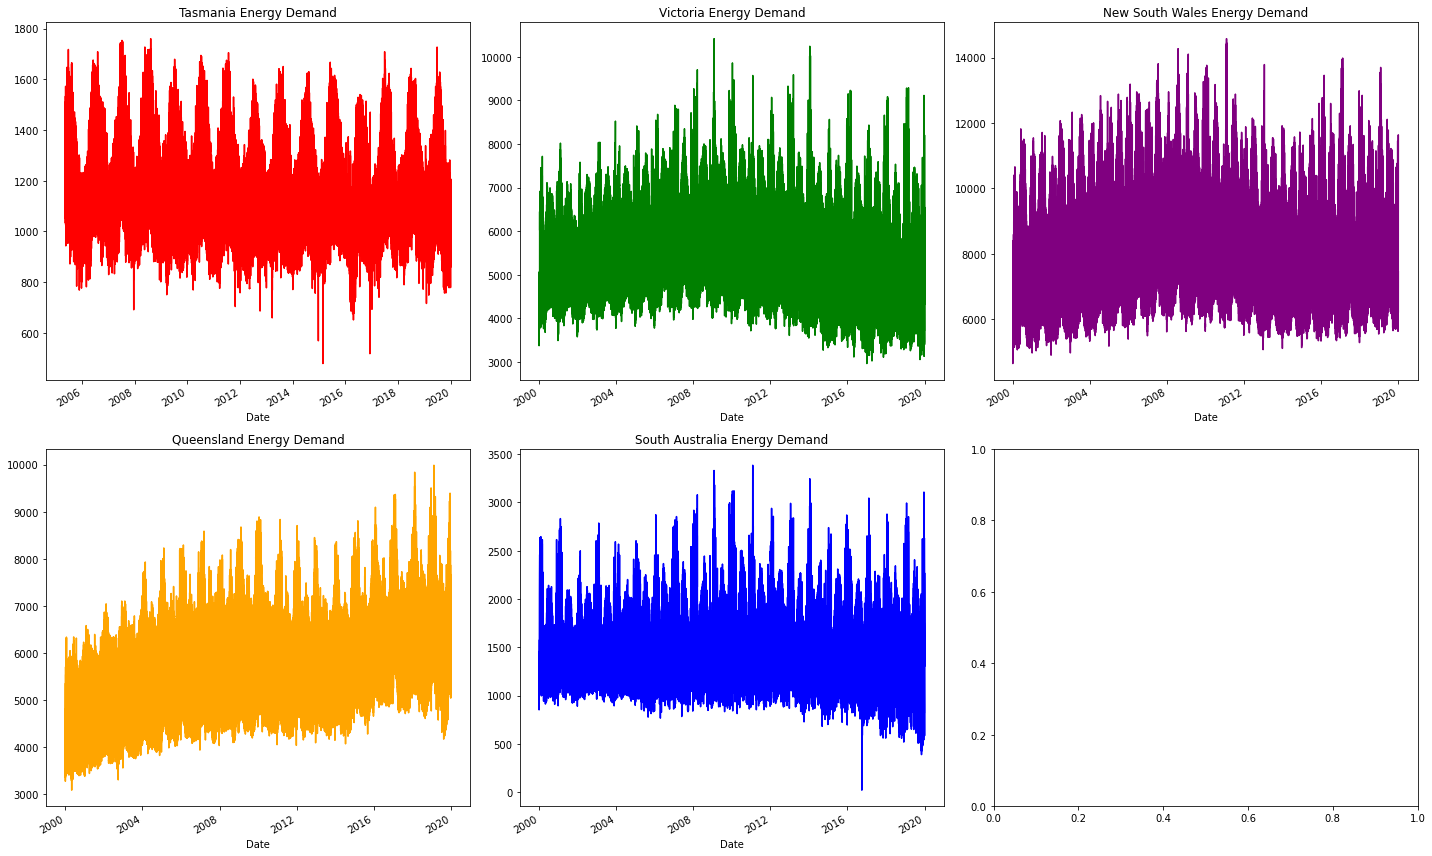

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), tight_layout=True)

energy_data.groupby("Region").get_group("TAS")["TotalDemand"]["2000":"2019"].plot(color= "red",title="Tasmania Energy Demand",ax=axes[0,0]);
energy_data.groupby("Region").get_group("VIC")["TotalDemand"]["2000":"2019"].plot(color= "green",title="Victoria Energy Demand",ax=axes[0,1]);
energy_data.groupby("Region").get_group("NSW")["TotalDemand"]["2000":"2019"].plot(color= "purple",title="New South Wales Energy Demand",ax=axes[0,2]);
energy_data.groupby("Region").get_group("QLD")["TotalDemand"]["2000":"2019"].plot(color= "orange",title="Queensland Energy Demand",ax=axes[1,0]);
energy_data.groupby("Region").get_group("SA")["TotalDemand"]["2000":"2019"].plot(color="blue",title="South Australia Energy Demand",ax=axes[1,1]);

As can be seen, the plots are all continuous, indicating that there is no significant source of missing data.
There are a few more tendencies here, but we'll save those for another time!
Now we'll look at weather data.
Although the % of missing data may be found readily, the graphs clearly highlight the nature of the null values.
We can quickly identify where it is lacking, indicating which approach should be utilised (i.e. removing the data, resampling, etc).
"'WetBulbTemperature"' is the first variable we examine.
We'll notice that, like our energy data, it's mostly intact.
Then we'll see "AirTemperature," which will be rough and frayed.
Only a few significant graphs are given here for brevity.
However, there is a lot more that can be graphed (please experiment with the code to see what more you can do)!
"'AirTemperature"' has issues that are comparable to those in the following features:
* Windspeed * WindDirection * WindgustSpeed * Precipitation * AirTemperature * DewTemperature * RelativeHumidity

/tmp/ipykernel_3739/3860211768.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  temperature_data.groupby("Region").get_group("VIC")["WetBulbTemperature"]["2000":"2019"].plot(color= "green",title="Victoria Wet Bulb Temperature",ax=axes[0,1]);


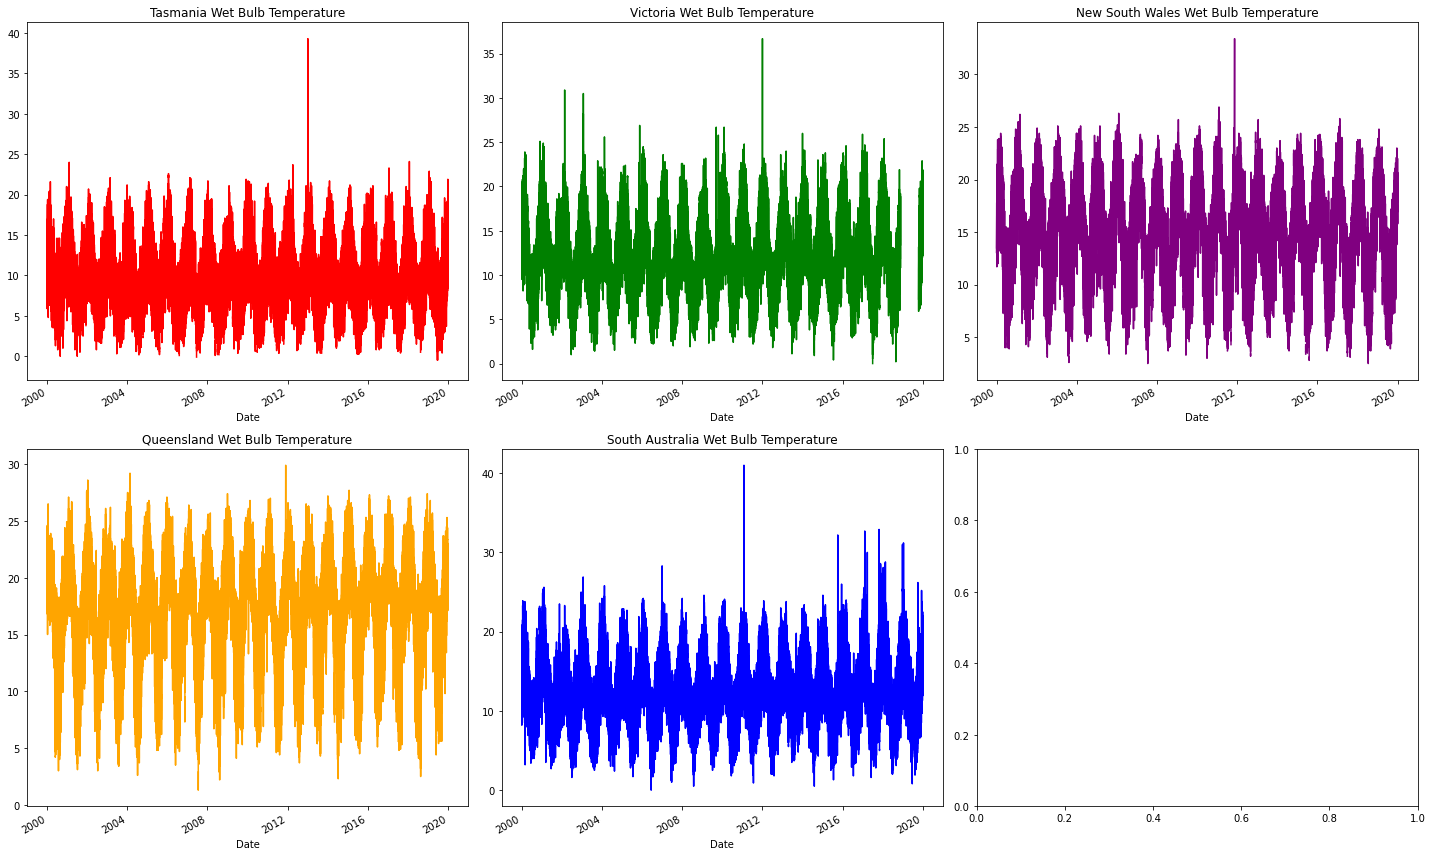

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), tight_layout=True)

temperature_data.groupby("Region").get_group("TAS")["WetBulbTemperature"]["2000":"2019"].plot(color= "red",title="Tasmania Wet Bulb Temperature",ax=axes[0,0]);
temperature_data.groupby("Region").get_group("VIC")["WetBulbTemperature"]["2000":"2019"].plot(color= "green",title="Victoria Wet Bulb Temperature",ax=axes[0,1]);
temperature_data.groupby("Region").get_group("NSW")["WetBulbTemperature"]["2000":"2019"].plot(color= "purple",title="New South Wales Wet Bulb Temperature",ax=axes[0,2]);
temperature_data.groupby("Region").get_group("QLD")["WetBulbTemperature"]["2000":"2019"].plot(color= "orange",title="Queensland Wet Bulb Temperature",ax=axes[1,0]);
temperature_data.groupby("Region").get_group("SA")["WetBulbTemperature"]["2000":"2019"].plot(color= "blue",title="South Australia Wet Bulb Temperature",ax=axes[1,1]);

/tmp/ipykernel_3739/3915667674.py:4: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  temperature_data.groupby("Region").get_group("VIC")["AirTemperature"]["2000":"2019"].plot(color= "green",title="Victoria Air Temperature",ax=axes[0,1]);


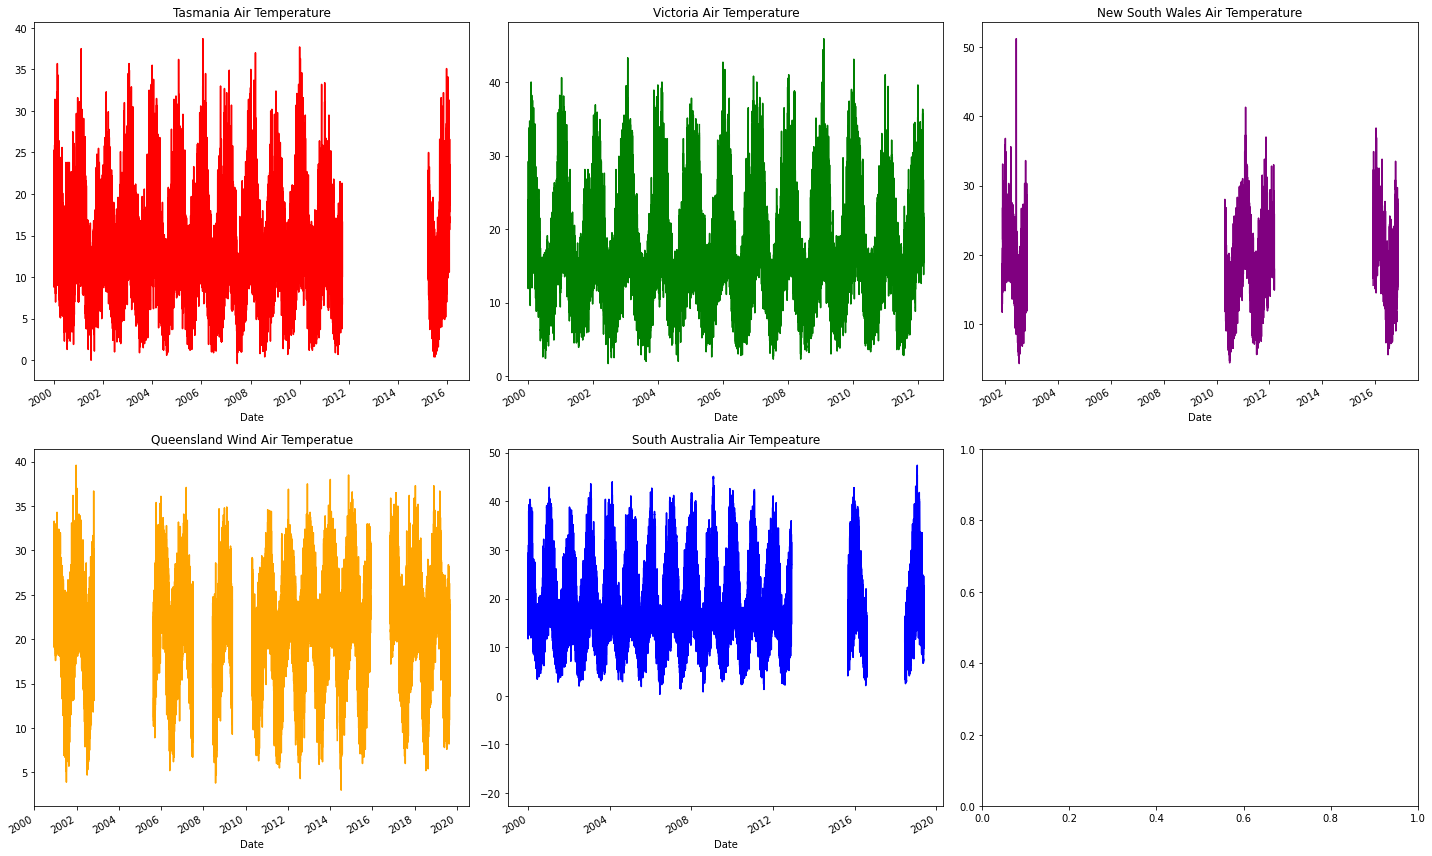

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12), tight_layout=True)

temperature_data.groupby("Region").get_group("TAS")["AirTemperature"]["2000":"2019"].plot(color= "red",title="Tasmania Air Temperature",ax=axes[0,0]);
temperature_data.groupby("Region").get_group("VIC")["AirTemperature"]["2000":"2019"].plot(color= "green",title="Victoria Air Temperature",ax=axes[0,1]);
temperature_data.groupby("Region").get_group("NSW")["AirTemperature"]["2000":"2019"].plot(color= "purple",title="New South Wales Air Temperature",ax=axes[0,2]);
temperature_data.groupby("Region").get_group("QLD")["AirTemperature"]["2000":"2019"].plot(color= "orange",title="Queensland Wind Air Temperatue",ax=axes[1,0]);
temperature_data.groupby("Region").get_group("SA")["AirTemperature"]["2000":"2019"].plot(color= "blue",title="South Australia Air Tempeature",ax=axes[1,1]);

The lack of missing months to years of air temperature data (the blank areas) at random points in the graph shows that it is not worth investigating further.
This isn't necessarily a bad thing; it allows us to concentrate on what's in front of us: energy demand and wet bulb temperature.

These graphs depict big or regular chunks of missing data, but not little quantities that are randomly dispersed.
We can rapidly determine whether values are null using Pandas"'DataFrame.isnull"'.
It instantly demonstrates that our energy data is in pristine condition (no gaps), however numerous temperature columns have a significant amount of data missing!

Most features will be removed because they would need us to sacrifice a big number of rows.

In [22]:
def get_null_counts(dataframe: pd.DataFrame):
    return dataframe.isnull().mean()[dataframe.isnull().mean() > 0]

In [23]:
get_null_counts(energy_data)
get_null_counts(temperature_data)

Series([], dtype: float64)

Precipitation         0.229916
AirTemperature        0.444437
WetBulbTemperature    0.011324
DewTemperature        0.375311
RelativeHumidity      0.375312
WindSpeed             0.532966
WindDirection         0.432305
WindgustSpeed         0.403183
SeaPressure           0.137730
StationPressure       0.011135
dtype: float64

In [24]:
remove_columns = ["Precipitation", "AirTemperature", "DewTemperature", "RelativeHumidity", "WindSpeed", "WindDirection", "WindgustSpeed"]
temperature_data.drop(remove_columns, axis=1, inplace=True)

# Note that using inplace currently throws an error
# So interpolated columns must be manually overridden
missing_columns = list(get_null_counts(temperature_data).keys())
temperature_data[missing_columns] = temperature_data[missing_columns].interpolate(method="time")

## Using energy and temperature data together
Now comes the final step.
Combining the two dataframes into one, allowing us to link our temperature data to energy consumption.

To merge the two datasets, we can use the "merge asof" method.
This function combines the *nearest values*.
We use the "by" argument to specify that the data is grouped by region.
We can only integrate energy and temperature entries that are less than 30 minutes apart.

In [25]:
energy_data.sort_index(inplace=True)
temperature_data.sort_index(inplace=True)

data = pd.merge_asof(energy_data, temperature_data, left_index=True, right_index=True, by="Region", tolerance=pd.Timedelta("30 min"))

To check whether the merge has happened successfully, we can check how many null values are present.
This works since unpaired rows cause null values.

In [26]:
get_null_counts(data)
data.dropna(inplace=True)

WetBulbTemperature    0.013621
SeaPressure           0.013621
StationPressure       0.013621
AWSFlag               0.013621
dtype: float64

Now we can finally see some clean and sensible data!
This is the first table we see which does not pose a massive health and safety hazard.
Now that we've got to this stage we should celebrate... it only gets better from here 👊.

In [27]:
data

,Region,TotalDemand,RRP,WetBulbTemperature,SeaPressure,StationPressure,AWSFlag
Date,,,,,,,
2000-01-01 00:30:00,NSW,6763.57000,15.64,14.1,1011.1,1006.4,0
2000-01-01 00:30:00,VIC,4419.03667,9.97,10.5,1017.0,1013.1,0
2000-01-01 00:30:00,SA,1328.68667,38.54,10.1,1018.7,1012.6,0
2000-01-01 00:30:00,QLD,3905.56833,39.40,19.2,1007.2,1006.2,0
2000-01-01 01:00:00,NSW,6386.10167,14.06,13.7,1011.0,1006.3,0
...,...,...,...,...,...,...,...
2020-01-01 00:00:00,TAS,1006.70000,93.88,9.5,1014.9,1004.6,0
2020-01-01 00:00:00,NSW,7318.64000,50.01,15.7,1014.9,1008.8,0
2020-01-01 00:00:00,QLD,6218.39000,52.15,21.6,1014.9,1013.8,0


## Saving final data

In [28]:
pd.to_pickle(data, "../Data/Data.pickle")